# 分类


In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(1)
%matplotlib inline

## squeeze and unsqueeze
squeeze 消除整个张量中维度为1的维度轴，从而缩减不必要的数据维度,有压缩squeeze的意味<br/>
a.shape=m×n×1×p×q......通过torch.squeeze(a,-1)-->a.shape=(m×n×p×q)<br/>
>dim=-1表示自动消除的意思，如果也可以指定维度，如果张量维度中没有1维数据，则这个函数失效

unsqueeze()是给张量增加一个1维的维度轴，与squeeze的作用正好相反<br/>
a.shape=m×n.....通过torch.unsqueeze(a,0)就是指在[0]维度前面添加一个维度，a.shape=1×m×n<br/>
>dim是指在哪个维度前面，注意范围不能超过原来张量维度的(索引+1)范围，-1是指在最后面添加一个维度，a.shape=m×n×1

In [6]:
a=torch.Tensor([[1,2,3],[4,5,6]])
a=torch.unsqueeze(a,2)#
print (a)



(0 ,.,.) = 
  1
  2
  3

(1 ,.,.) = 
  4
  5
  6
[torch.FloatTensor of size 2x3x1]



In [23]:
import numpy as np
a=np.array([[1,2],[3,7],[5,6]])
a=torch.from_numpy(a)
a=Variable(a)
a=a.view(6,-1)
print (a.size())
print (a)
b=torch.max(a,0)[0]#[0]返回的是数值，[1]返回的是坐标
b.data.numpy().squeeze()#将二维改成一维

RuntimeError: invalid argument 1: only one dimension can be inferred at /opt/conda/conda-bld/pytorch_1512386481460/work/torch/lib/TH/THStorage.c:28

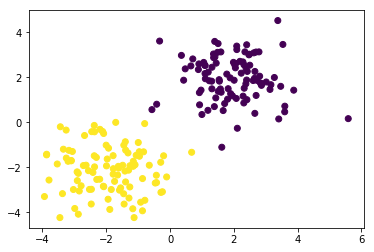

In [15]:
n_data=torch.ones(100,2)
x0=torch.normal(2*n_data,1)
y0=torch.zeros(100)
x1=torch.normal(-2*n_data,1)
y1=torch.ones(100)
x=torch.cat((x0,x1),0).type(torch.FloatTensor)
y=torch.cat((y0,y1),).type(torch.LongTensor)#此处要用Long，否则后面会报错
x,y=Variable(x),Variable(y)
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy())#颜色是如何划分的？

In [16]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):#数据是从forward输入，forward负责神经网络的正向传播
        x=F.relu(self.hidden(x))
        x=self.out(x)
        return x
net=Net(2,10,2)
print (net)
plt.ion()
plt.show()

Net(
  (hidden): Linear(in_features=2, out_features=10)
  (out): Linear(in_features=10, out_features=2)
)


In [17]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.02)
loss_func=torch.nn.CrossEntropyLoss()


/home/wdd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


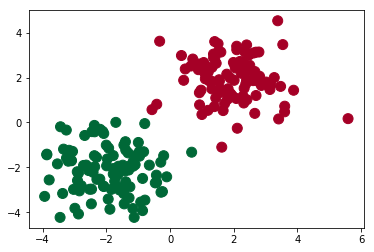

NameError: name 'time' is not defined

In [18]:
for t in range(100):
    prediction=net(x)
    loss=loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%10==0 or t in [3,6]:
        plt.cla()
        predicition=torch.max(F.softmax(prediction),1)
        target_y=y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=100,cmap='RdYlGn')
        accuracy=sum(pred_y==target_y)/200.
        plt.show()
        plt.pause(1)
plt.ioff()

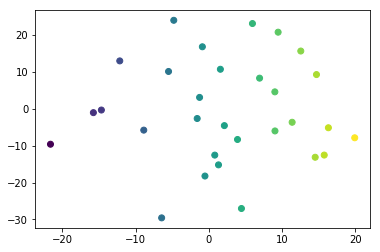

In [30]:
a=np.random.normal(0,10,(30,30))
b=np.random.normal(0,15,(30,30))
plt.scatter(a[:,0],b[:,0],c=a[:,0])